
Architecture of a regression model
* Input shapes and output shapes
* X: features/data (inputs)
*y: labels (outputs)
*Creating custom data to view and fit
*Steps in modelling
  * Creating a model
  * Compiling a model
    * Defining a loss function
    * Setting up an optimizer
    * Creating evaluation metrics
  * Fitting a model (getting it to find patterns in our data)
* Evaluating a model
  * Visualizng the model ("visualize, visualize, visualize")
  * Looking at training curves
  * Compare predictions to ground truth (using our evaluation metrics)
* Saving a model (so we can use it later)
* Loading a model

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


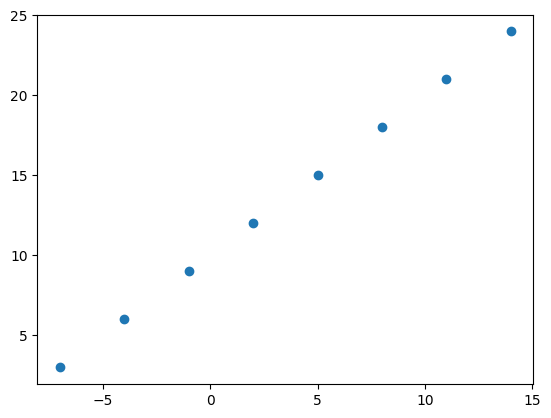

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize

plt.scatter(X,y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X = tf.constant(X)
y= tf.constant(y)

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
X.ndim

1

In [ ]:
#modeling with tensorflow

#set random seed
tf.random.set_seed(42)

#creating the model using the sequential API
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential


model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1),
])

# complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)



Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 13.4082 - mae: 13.4082
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 12.7561 - mae: 12.7561
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 12.0983 - mae: 12.0983
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 11.4323 - mae: 11.4323
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 10.7564 - mae: 10.7564
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 10.0681 - mae: 10.0681
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 9.3642 - mae: 9.3642
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 8.6410 - mae: 8.6410
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.8947 - mae: 7.8947
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.1217 - mae: 7.1217
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 6.7070 - mae: 6.7070
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 6.9571 - mae: 6.9571
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


array([[27.38729]], dtype=float32)

Improving the model

In [ ]:
model.predict(tf.constant([[20.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[30.443933]], dtype=float32)

Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...

It's a good idea to visualize:

* The data - what data are you working with? What does it look like?
* The model itself - what does the architecture look like? What are the different shapes?
* The training of a model - how does a model perform while it learns?
* The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
X = tf.range(-1000, 1000, 5)
X

<tf.Tensor: shape=(400,), dtype=int32, numpy=
array([-1000,  -995,  -990,  -985,  -980,  -975,  -970,  -965,  -960,
        -955,  -950,  -945,  -940,  -935,  -930,  -925,  -920,  -915,
        -910,  -905,  -900,  -895,  -890,  -885,  -880,  -875,  -870,
        -865,  -860,  -855,  -850,  -845,  -840,  -835,  -830,  -825,
        -820,  -815,  -810,  -805,  -800,  -795,  -790,  -785,  -780,
        -775,  -770,  -765,  -760,  -755,  -750,  -745,  -740,  -735,
        -730,  -725,  -720,  -715,  -710,  -705,  -700,  -695,  -690,
        -685,  -680,  -675,  -670,  -665,  -660,  -655,  -650,  -645,
        -640,  -635,  -630,  -625,  -620,  -615,  -610,  -605,  -600,
        -595,  -590,  -585,  -580,  -575,  -570,  -565,  -560,  -555,
        -550,  -545,  -540,  -535,  -530,  -525,  -520,  -515,  -510,
        -505,  -500,  -495,  -490,  -485,  -480,  -475,  -470,  -465,
        -460,  -455,  -450,  -445,  -440,  -435,  -430,  -425,  -420,
        -415,  -410,  -405,  -400,  -395,  -

In [ ]:
y= 10*X - 20
y

<tf.Tensor: shape=(400,), dtype=int32, numpy=
array([-10020,  -9970,  -9920,  -9870,  -9820,  -9770,  -9720,  -9670,
        -9620,  -9570,  -9520,  -9470,  -9420,  -9370,  -9320,  -9270,
        -9220,  -9170,  -9120,  -9070,  -9020,  -8970,  -8920,  -8870,
        -8820,  -8770,  -8720,  -8670,  -8620,  -8570,  -8520,  -8470,
        -8420,  -8370,  -8320,  -8270,  -8220,  -8170,  -8120,  -8070,
        -8020,  -7970,  -7920,  -7870,  -7820,  -7770,  -7720,  -7670,
        -7620,  -7570,  -7520,  -7470,  -7420,  -7370,  -7320,  -7270,
        -7220,  -7170,  -7120,  -7070,  -7020,  -6970,  -6920,  -6870,
        -6820,  -6770,  -6720,  -6670,  -6620,  -6570,  -6520,  -6470,
        -6420,  -6370,  -6320,  -6270,  -6220,  -6170,  -6120,  -6070,
        -6020,  -5970,  -5920,  -5870,  -5820,  -5770,  -5720,  -5670,
        -5620,  -5570,  -5520,  -5470,  -5420,  -5370,  -5320,  -5270,
        -5220,  -5170,  -5120,  -5070,  -5020,  -4970,  -4920,  -4870,
        -4820,  -4770,  -4720, 

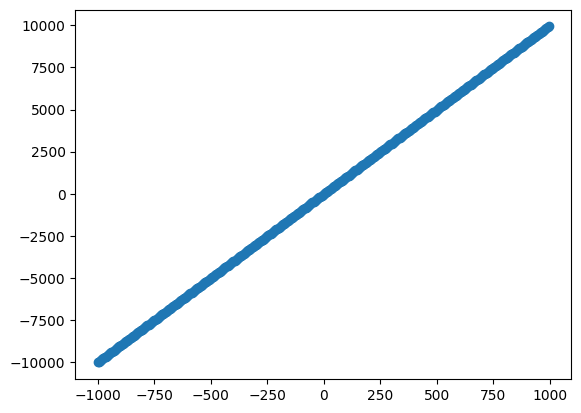

In [ ]:
plt.scatter(X, y)

#***Split the data into training, validation, and test sets***
* **Training set** -* the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).*
* **Validation set** - *the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).*
* **Test set** - *the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).*

In [ ]:
len(X)

400

In [ ]:
X_train = X[:350]
y_train = y[:350]
X_test = X[350:]
y_test = y[350:]
len(X_train), len(X_test), len(y_train), len(y_test)

(350, 50, 350, 50)

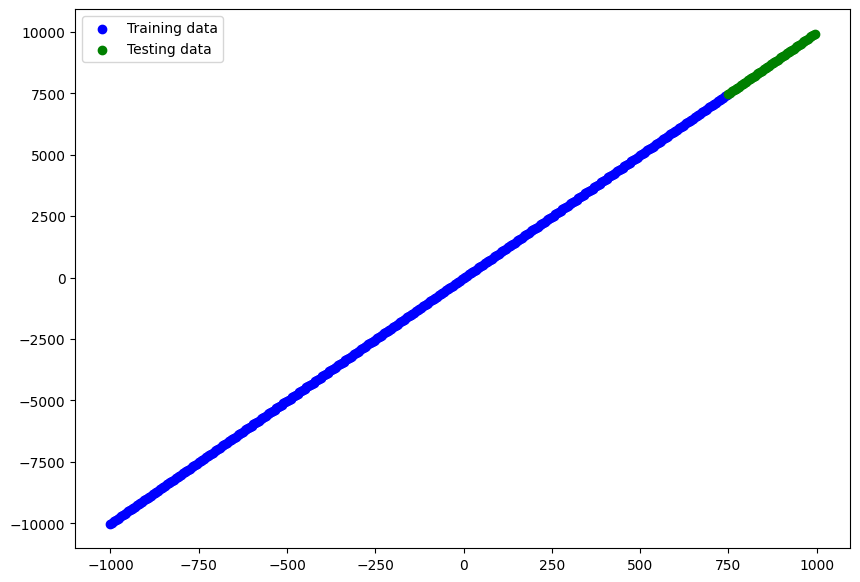

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend()


In [ ]:
X_train = tf.reshape(X_train, (X_train.shape[0], -1))  # Now shape = (350, 1)
y_train = tf.reshape(y_train, (y_train.shape[0], 1))  # Now shape = (350, 1)
print(X_train.shape)  # (350, 1)
print(y_train.shape)  # (350, 1)


(350, 1)
(350, 1)


In [ ]:

#X_train = tf.expand_dims(X_train, axis=-1)

#set random seed
tf.random.set_seed(42)

#creating the model using the sequential API
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,), name = "input_layer"),  # assuming input is (num_samples, 1)
    tf.keras.layers.Dense(1, name = "output_layer")  # output layer with 10 units
], name= "model_1")

model.compile(
    loss='mae',  # mean absolute error for regression
    optimizer='adam',
    metrics=['mae']
)

model.summary()

# Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [ ]:
X_train = tf.expand_dims(X_train, axis=-1)  # shape: (num_samples, 1)
print(X_train.shape)  # should be (num_samples, 1)
print(y_train.shape)  # should be (num_samples, 10)


(350, 1, 1)
(350, 1)


In [ ]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 4435.5703 - mae: 4435.5703
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4403.1919 - mae: 4403.1919
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4370.0186 - mae: 4370.0186 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4335.7993 - mae: 4335.7993 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4300.3750 - mae: 4300.3750 
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4263.5845 - mae: 4263.5845 
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4225.2593 - mae: 4225.2593 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4185.2588 - mae: 4185.2588 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4143.4839 - mae: 4143.4839 
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4099.8687 - mae: 4099.8687 
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4054.3647 - mae: 4054.3647 
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


array([[7487.472 ],
       [7537.481 ],
       [7587.488 ],
       [7637.4966],
       [7687.5044],
       [7737.5127],
       [7787.521 ],
       [7837.5293],
       [7887.5376],
       [7937.546 ],
       [7987.553 ],
       [8037.5615],
       [8087.57  ],
       [8137.5776],
       [8187.5854],
       [8237.595 ],
       [8287.603 ],
       [8337.61  ],
       [8387.618 ],
       [8437.627 ],
       [8487.635 ],
       [8537.644 ],
       [8587.651 ],
       [8637.659 ],
       [8687.667 ],
       [8737.676 ],
       [8787.684 ],
       [8837.691 ],
       [8887.699 ],
       [8937.708 ],
       [8987.716 ],
       [9037.725 ],
       [9087.732 ],
       [9137.741 ],
       [9187.748 ],
       [9237.757 ],
       [9287.765 ],
       [9337.773 ],
       [9387.781 ],
       [9437.789 ],
       [9487.797 ],
       [9537.806 ],
       [9587.813 ],
       [9637.822 ],
       [9687.829 ],
       [9737.838 ],
       [9787.847 ],
       [9837.854 ],
       [9887.862 ],
       [9937.87  ]],

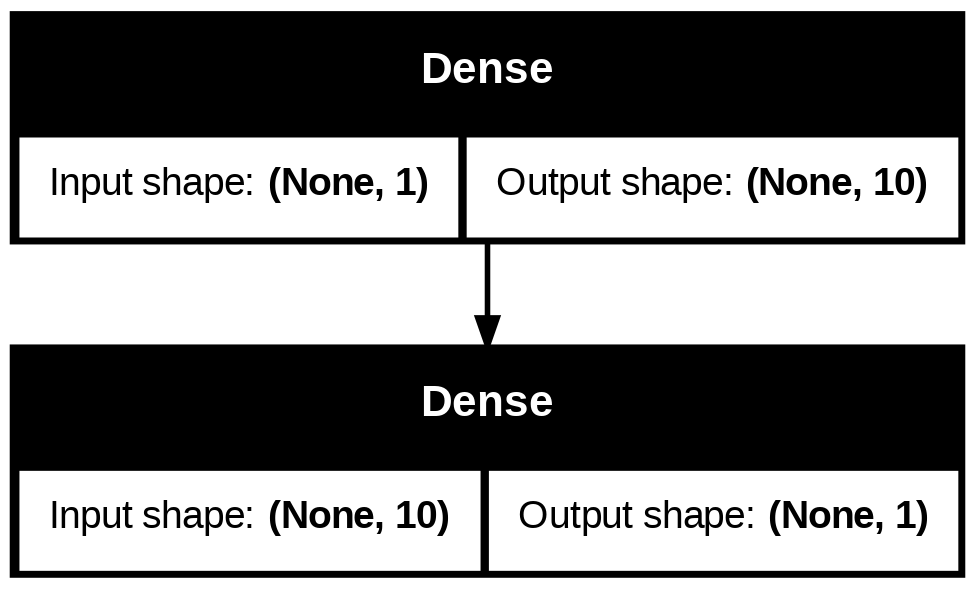

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes=True)

In [ ]:
y_pred = model.predict(X_test)
y_pred

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[7487.472 ],
       [7537.481 ],
       [7587.488 ],
       [7637.4966],
       [7687.5044],
       [7737.5127],
       [7787.521 ],
       [7837.5293],
       [7887.5376],
       [7937.546 ],
       [7987.553 ],
       [8037.5615],
       [8087.57  ],
       [8137.5776],
       [8187.5854],
       [8237.595 ],
       [8287.603 ],
       [8337.61  ],
       [8387.618 ],
       [8437.627 ],
       [8487.635 ],
       [8537.644 ],
       [8587.651 ],
       [8637.659 ],
       [8687.667 ],
       [8737.676 ],
       [8787.684 ],
       [8837.691 ],
       [8887.699 ],
       [8937.708 ],
       [8987.716 ],
       [9037.725 ],
       [9087.732 ],
       [9137.741 ],
       [9187.748 ],
       [9237.757 ],
       [9287.765 ],
       [9337.773 ],
       [9387.781 ],
       [9437.789 ],
       [9487.797 ],
       [9537.806 ],
       [9587.813 ],
       [9637.822 ],
       [9687.829 ],
       [9737.838 ],
       [9787.847 ],
       [9837.854 ],
       [9887.862 ],
       [9937.87  ]],

In [ ]:
y_test

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([7480, 7530, 7580, 7630, 7680, 7730, 7780, 7830, 7880, 7930, 7980,
       8030, 8080, 8130, 8180, 8230, 8280, 8330, 8380, 8430, 8480, 8530,
       8580, 8630, 8680, 8730, 8780, 8830, 8880, 8930, 8980, 9030, 9080,
       9130, 9180, 9230, 9280, 9330, 9380, 9430, 9480, 9530, 9580, 9630,
       9680, 9730, 9780, 9830, 9880, 9930], dtype=int32)>

In [ ]:
#create a plotting function to reuse later

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label = "Training Data")
  plt.scatter(test_data, test_labels, c = "g", label = "Testing Data")
  plt.scatter(test_data, predictions, c="r", label = "PRedictions")
  plt.legend()

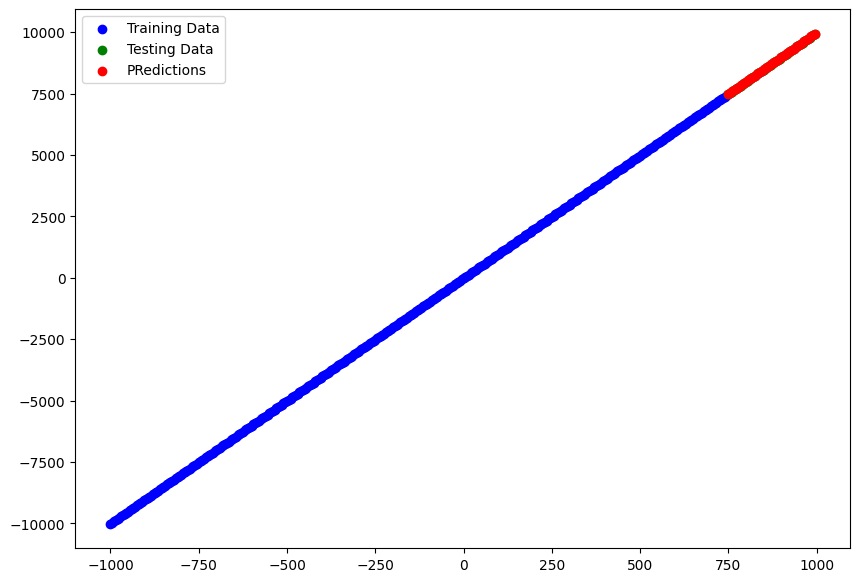

In [ ]:
plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = y_pred)

In [ ]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 7.6470 - mae: 7.6470


[7.67135763168335, 7.67135763168335]

In [ ]:
#Calculate the mean absolute error
mae = tf.metrics.mae(y_test, y_pred)

In [ ]:
mae

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([7.472168 , 7.480957 , 7.487793 , 7.496582 , 7.5043945, 7.5126953,
       7.520996 , 7.529297 , 7.5375977, 7.5458984, 7.5532227, 7.5615234,
       7.569824 , 7.5776367, 7.585449 , 7.5947266, 7.602539 , 7.6103516,
       7.618164 , 7.626953 , 7.6347656, 7.6435547, 7.651367 , 7.6591797,
       7.666992 , 7.6757812, 7.6835938, 7.6914062, 7.6992188, 7.708008 ,
       7.7158203, 7.7246094, 7.732422 , 7.741211 , 7.748047 , 7.756836 ,
       7.7646484, 7.7734375, 7.78125  , 7.7890625, 7.796875 , 7.805664 ,
       7.8134766, 7.8222656, 7.8291016, 7.8378906, 7.8466797, 7.8535156,
       7.8623047, 7.870117 ], dtype=float32)>

In [ ]:
y_pred

array([[7487.472 ],
       [7537.481 ],
       [7587.488 ],
       [7637.4966],
       [7687.5044],
       [7737.5127],
       [7787.521 ],
       [7837.5293],
       [7887.5376],
       [7937.546 ],
       [7987.553 ],
       [8037.5615],
       [8087.57  ],
       [8137.5776],
       [8187.5854],
       [8237.595 ],
       [8287.603 ],
       [8337.61  ],
       [8387.618 ],
       [8437.627 ],
       [8487.635 ],
       [8537.644 ],
       [8587.651 ],
       [8637.659 ],
       [8687.667 ],
       [8737.676 ],
       [8787.684 ],
       [8837.691 ],
       [8887.699 ],
       [8937.708 ],
       [8987.716 ],
       [9037.725 ],
       [9087.732 ],
       [9137.741 ],
       [9187.748 ],
       [9237.757 ],
       [9287.765 ],
       [9337.773 ],
       [9387.781 ],
       [9437.789 ],
       [9487.797 ],
       [9537.806 ],
       [9587.813 ],
       [9637.822 ],
       [9687.829 ],
       [9737.838 ],
       [9787.847 ],
       [9837.854 ],
       [9887.862 ],
       [9937.87  ]],

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([7487.472 , 7537.481 , 7587.488 , 7637.4966, 7687.5044, 7737.5127,
       7787.521 , 7837.5293, 7887.5376, 7937.546 , 7987.553 , 8037.5615,
       8087.57  , 8137.5776, 8187.5854, 8237.595 , 8287.603 , 8337.61  ,
       8387.618 , 8437.627 , 8487.635 , 8537.644 , 8587.651 , 8637.659 ,
       8687.667 , 8737.676 , 8787.684 , 8837.691 , 8887.699 , 8937.708 ,
       8987.716 , 9037.725 , 9087.732 , 9137.741 , 9187.748 , 9237.757 ,
       9287.765 , 9337.773 , 9387.781 , 9437.789 , 9487.797 , 9537.806 ,
       9587.813 , 9637.822 , 9687.829 , 9737.838 , 9787.847 , 9837.854 ,
       9887.862 , 9937.87  ], dtype=float32)>

In [ ]:
mae = tf.metrics.mae(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=7.67135763168335>

In [ ]:
mse = tf.metrics.mse(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=58.86347579956055>

In [ ]:
def mae(y_true, y_pred):
  MAE = tf.metrics.mae(y_true = y_true,
                        y_pred =tf.squeeze(y_pred))
  return print("MAE: ", MAE)

def mse(y_true, y_pred):
  MSE = tf.metrics.mse(y_true = y_true,
                        y_pred = tf.squeeze(y_pred))
  return print("MSE: ", MSE)

In [ ]:
mse(y_test, tf.squeeze(y_pred))

MSE:  tf.Tensor(58.863476, shape=(), dtype=float32)


In [ ]:
#modeling eperiments
#model 1 1 layer, 100 epochs

tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model1.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["mae"])
model1.fit(X_train, y_train, epochs=100)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 4758.3154 - mae: 4758.3154
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4753.2388 - mae: 4753.2388  
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4748.1548 - mae: 4748.1548 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4743.0625 - mae: 4743.0625 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4737.9648 - mae: 4737.9648 
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4732.8628 - mae: 4732.8628 
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4727.7583 - mae: 4727.7583 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4722.6514 - mae: 4722.6514 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4717.5430 - mae: 4717.5430 
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4712.4331 - mae: 4712.4331 
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4707.3218 - mae: 4707.3218 
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


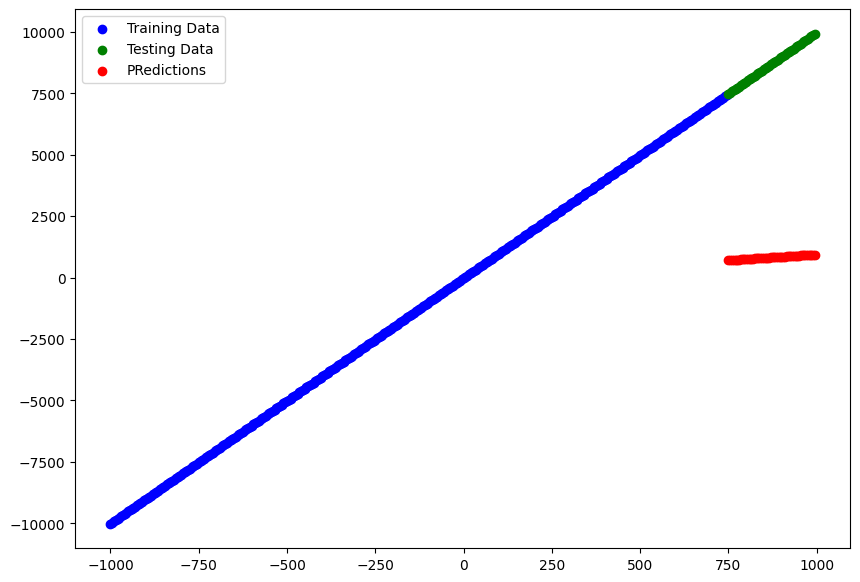

In [ ]:
X_test = tf.reshape(X_test, (-1, 1, 1))  # shape: (num_samples, 1, 1)
y_pred1 = model1.predict(X_test)

plot_predictions(predictions = tf.squeeze(y_pred1))

In [ ]:
mae1 = mae(y_test,y_pred1)
mse1 = mse(y_test, y_pred1)
mae1, mse1

MAE:  tf.Tensor(7879.3213, shape=(), dtype=float32)
MSE:  tf.Tensor(62510376.0, shape=(), dtype=float32)


(None, None)

In [ ]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

model2.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["mae"])

model2.fit(X_train, y_train, epochs=100)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 4876.0938 - mae: 4876.0938
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4833.3149 - mae: 4833.3149
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4790.4443 - mae: 4790.4443
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4747.4399 - mae: 4747.4399
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4704.2646 - mae: 4704.2646 
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4660.8696 - mae: 4660.8696
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4617.1987 - mae: 4617.1987
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4573.1904 - mae: 4573.1904 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4528.7773 - mae: 4528.7773
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4483.8862 - mae: 4483.8862
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4438.4370 - mae: 4438.4370 
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


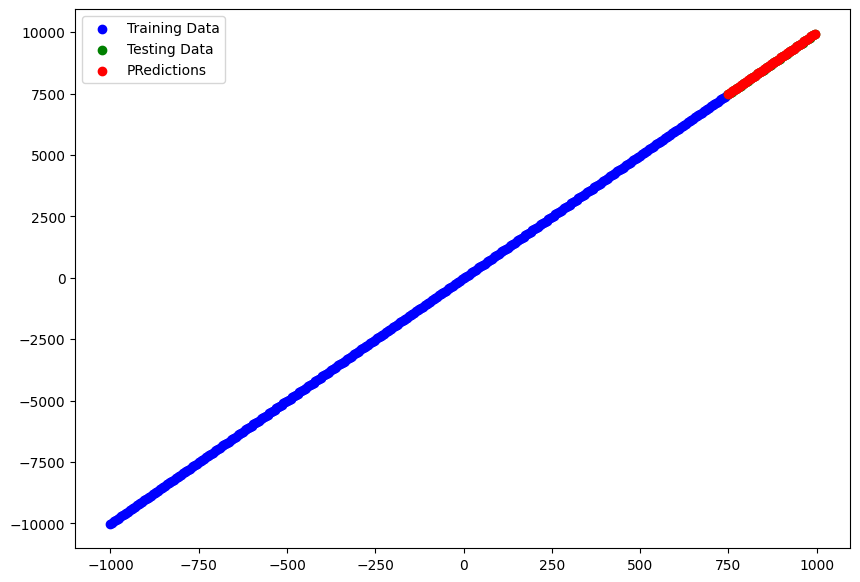

In [ ]:
#make and plot predictions

y_pred2 =model2.predict(X_test)
plot_predictions(predictions = y_pred2)

In [ ]:
mae2 = mae(y_test,y_pred2)
mse2 = mse(y_test, y_pred2)
mae2, mse2

MAE:  tf.Tensor(8.2004, shape=(), dtype=float32)
MSE:  tf.Tensor(67.28956, shape=(), dtype=float32)


(None, None)

In [ ]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

model3.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["mae"])

model3.fit(X_train, y_train, epochs=200)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 4325.8911 - mae: 4325.8911
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4283.5381 - mae: 4283.5381 
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4240.7954 - mae: 4240.7954 
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4197.4834 - mae: 4197.4834 
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4153.3262 - mae: 4153.3262 
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4108.0552 - mae: 4108.0552 
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4061.5176 - mae: 4061.5176 
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4013.6377 - mae: 4013.6377  
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3964.3696 - mae: 3964.3696 
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3913.6780 - mae: 3913.6780 
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3861.5322 - mae: 3861.5322 
Epoch 12/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


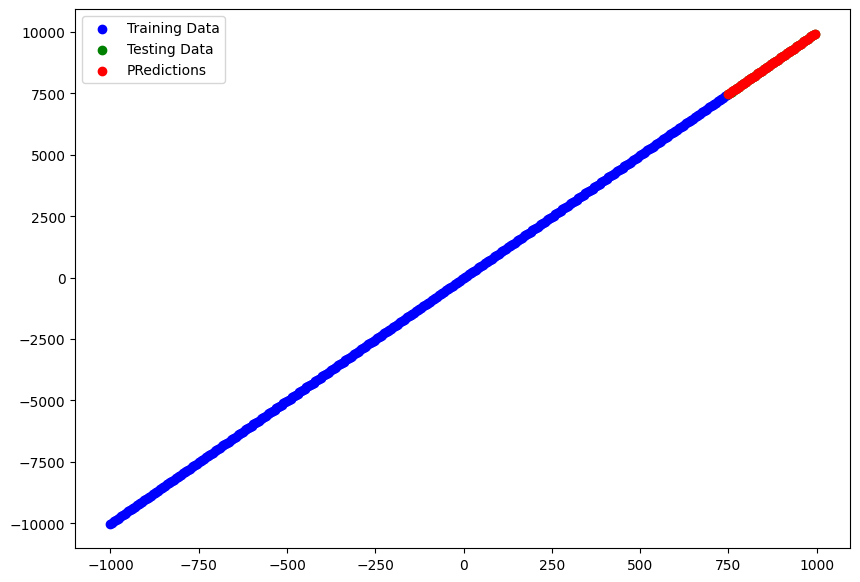

In [ ]:
#make and plot predictions

y_pred3 =model3.predict(X_test)
plot_predictions(predictions = y_pred3)

In [ ]:
mae3 = mae(y_test,y_pred3)
mse3 = mse(y_test, y_pred3)
mae3, mse3

MAE:  tf.Tensor(0.7271875, shape=(), dtype=float32)
MSE:  tf.Tensor(0.5324204, shape=(), dtype=float32)


(None, None)

In [ ]:
#saving a model
model3.save("model3_SavedModel_format.keras")

In [ ]:
model3.save("Model3_hdf5_format.h5")

In [ ]:
#Load the model

loaded_saved_model = tf.keras.models.load_model("model3_SavedModel_format.keras")
loaded_saved_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 1, 10)          │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1, 1)           │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

In [ ]:
model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 1, 10)          │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1, 1)           │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

In [ ]:
#Comparing the results of model3 with the loaded model
model3_preds = model3.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
model3_preds.squeeze() == saved_model_preds.squeeze()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:
#Downloading a model from colab

from google.colab import files
files.download("model3_SavedModel_format.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# check out the tf page https://www.tensorflow.org/tutorials/keras/save_and_load

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [ ]:
insurance['region'].unique()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
#lets one hot encode using get_dummies

insurance_oh = pd.get_dummies(insurance).astype(int)
insurance_oh

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,0,1,1,0,0,1,0,0
1334,18,31,0,2205,1,0,1,0,1,0,0,0
1335,18,36,0,1629,1,0,1,0,0,0,1,0
1336,21,25,0,2007,1,0,1,0,0,0,0,1


In [ ]:
#now lets create features and labels and create training and test datasets
X = insurance_oh.drop("charges", axis=1)
y = insurance_oh["charges"]
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,1,0,0,1,0,0,0,1
1,18,33,1,0,1,1,0,0,0,1,0
2,28,33,3,0,1,1,0,0,0,1,0
3,33,22,0,0,1,1,0,0,1,0,0
4,32,28,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

,charges
0,16884
1,1725
2,4449
3,21984
4,3866


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 10131.5781 - mae: 10131.5781
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7683.4258 - mae: 7683.4258
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7969.5391 - mae: 7969.5391
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7358.5688 - mae: 7358.5688
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7410.2578 - mae: 7410.2578
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7637.9326 - mae: 7637.9326
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7664.7861 - mae: 7664.7861
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7498.8115 - mae: 7498.8115
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7238.9727 - mae: 7238.9727
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7414.4980 - mae: 7414.4980
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7550.5483 - mae: 7550.5483
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 7999.2080 - mae: 7999.2080


[7964.16162109375, 7964.16162109375]

In [ ]:
y_train.median(), y_train.mean()

(9574.5, np.float64(13345.596261682243))

In [ ]:
# Improve the model by increasing the hidden layers or by increasing the epochs
tf.random.set_seed(42)

insurance_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model2.compile(loss= tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ["mae"])
insurance_model2.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 13271.4180 - mae: 13271.4180
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13130.9209 - mae: 13130.9209
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12828.0850 - mae: 12828.0850
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12210.4932 - mae: 12210.4932
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11140.2061 - mae: 11140.2061
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9703.7334 - mae: 9703.7334
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8294.0459 - mae: 8294.0459
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7517.9731 - mae: 7517.9731
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7386.8916 - mae: 7386.8916
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7358.9736 - mae: 7358.9736
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7337.7793 - mae: 7337.7793
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
insurance_model2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4930.2295 - mae: 4930.2295


[4788.42236328125, 4788.42236328125]

In [ ]:
tf.random.set_seed(42)

insurance_model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model3.compile(loss= tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ["mae"])
history1 = insurance_model3.fit(X_train, y_train, epochs = 300, verbose = 0)

In [ ]:
insurance_model3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3211.8657 - mae: 3211.8657


[3163.679931640625, 3163.679931640625]

Text(0.5, 0, 'epochs')

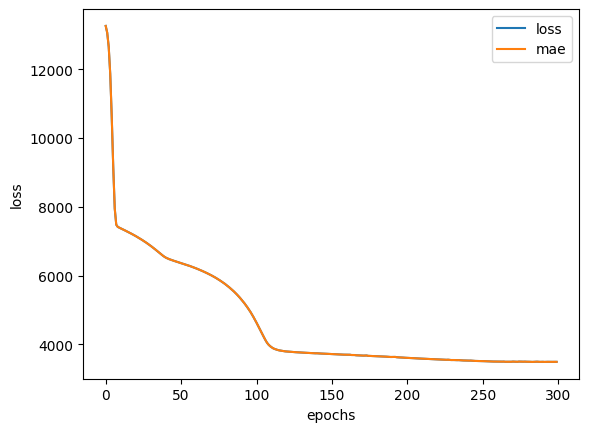

In [ ]:
pd.DataFrame(history1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
#Early stopping
from tensorflow.keras.callbacks import EarlyStopping

tf.random.set_seed(42)

insurance_model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model4.compile(loss= tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ["mae"])

early_stopping = EarlyStopping(
    monitor = "val_loss",
    patience = 3,
    restore_best_weights = True
)

history2 = insurance_model4.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    epochs = 300,
    callbacks = [early_stopping],
    verbose = 1)

Epoch 1/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 12681.8613 - mae: 12681.8613 - val_loss: 12582.9746 - val_mae: 12582.9746
Epoch 2/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12594.2061 - mae: 12594.2061 - val_loss: 12461.5303 - val_mae: 12461.5303
Epoch 3/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12449.8779 - mae: 12449.8779 - val_loss: 12238.2061 - val_mae: 12238.2061
Epoch 4/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12184.9414 - mae: 12184.9414 - val_loss: 11840.1475 - val_mae: 11840.1475
Epoch 5/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11722.1826 - mae: 11722.1826 - val_loss: 11182.0693 - val_mae: 11182.0693
Epoch 6/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10977.4170 - mae: 10977.4170 - val_loss: 10208.9707 - val_mae: 10208.9707
Epoch 7/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9934.4844 - mae: 9934.4844 - val_loss: 9083.8066 - val_mae: 9083.8066
Epoch 8/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8741.3252 - m

In [ ]:
insurance_model4.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3703.6311 - mae: 3703.6311


[3621.27099609375, 3621.27099609375]

Text(0.5, 0, 'epochs')

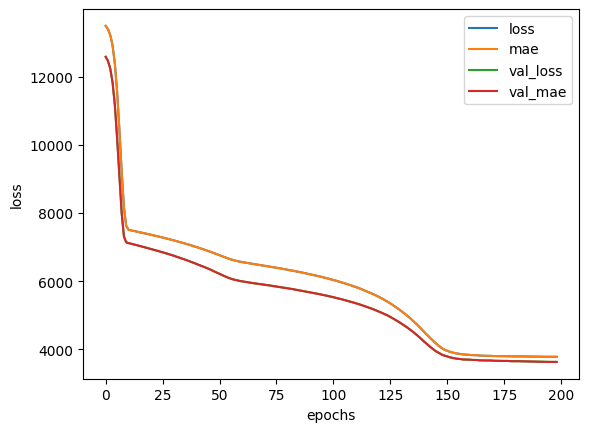

In [ ]:
pd.DataFrame(history2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
print("Epochs run:", len(history2.history['loss']))


Epochs run: 199


In [ ]:
test_loss, test_mae = insurance_model4.evaluate(X_test, y_test)
print("Test MAE:", test_mae)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3703.6311 - mae: 3703.6311 
Test MAE: 3621.27099609375
